# Covid-19

Some analysis with official data from WHO.

In [1]:
# libraries
import pandas as pd
import numpy as np
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# website
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
# mmount the file
file_path = os.path.join("data","covid")

In [3]:
# execute the download
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path,"WHO-COVID-19-global-data.csv")
urllib.request.urlretrieve(url,csv_path)

('data\\covid\\WHO-COVID-19-global-data.csv',
 <http.client.HTTPMessage at 0x186b9adf160>)

In [4]:
df = pd.read_csv(csv_path)
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
103599,2021-03-12,ZW,Zimbabwe,AFRO,36,36377,3,1492
103600,2021-03-13,ZW,Zimbabwe,AFRO,46,36423,4,1496
103601,2021-03-14,ZW,Zimbabwe,AFRO,48,36471,5,1501
103602,2021-03-15,ZW,Zimbabwe,AFRO,13,36484,2,1503


## The Data - General Picture

In [5]:
df_index = df.index
df_index

RangeIndex(start=0, stop=103604, step=1)

In [6]:
df_cols = df.columns
df_cols

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [7]:
df_index.values

array([     0,      1,      2, ..., 103601, 103602, 103603], dtype=int64)

In [8]:
df.values

array([['2020-01-03', 'AF', 'Afghanistan', ..., 0, 0, 0],
       ['2020-01-04', 'AF', 'Afghanistan', ..., 0, 0, 0],
       ['2020-01-05', 'AF', 'Afghanistan', ..., 0, 0, 0],
       ...,
       ['2021-03-14', 'ZW', 'Zimbabwe', ..., 36471, 5, 1501],
       ['2021-03-15', 'ZW', 'Zimbabwe', ..., 36484, 2, 1503],
       ['2021-03-16', 'ZW', 'Zimbabwe', ..., 36504, 1, 1504]],
      dtype=object)

In [9]:
df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [10]:
df.shape

(103604, 8)

In [11]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [12]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
103599,2021-03-12,ZW,Zimbabwe,AFRO,36,36377,3,1492
103600,2021-03-13,ZW,Zimbabwe,AFRO,46,36423,4,1496
103601,2021-03-14,ZW,Zimbabwe,AFRO,48,36471,5,1501
103602,2021-03-15,ZW,Zimbabwe,AFRO,13,36484,2,1503
103603,2021-03-16,ZW,Zimbabwe,AFRO,20,36504,1,1504


In [13]:
# Let's define how actual the data is:
actual = df.iloc[-1,0]
print(actual)
print(type(actual)) 

2021-03-16
<class 'str'>


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103604 entries, 0 to 103603
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      103604 non-null  object
 1   Country_code       103165 non-null  object
 2   Country            103604 non-null  object
 3   WHO_region         103604 non-null  object
 4   New_cases          103604 non-null  int64 
 5   Cumulative_cases   103604 non-null  int64 
 6   New_deaths         103604 non-null  int64 
 7   Cumulative_deaths  103604 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ MB


In [15]:
# general statistics
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,103604.000000,1.036040e+05,103604.000000,103604.000000
mean,1157.877109,1.480795e+05,25.644010,3775.422175
std,8557.389810,9.953616e+05,159.501311,20807.087728
min,-32952.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,1.000000e+01,0.000000,0.000000
50%,2.000000,1.195000e+03,0.000000,21.000000
75%,178.000000,2.380825e+04,3.000000,413.000000
max,667188.000000,2.915589e+07,9809.000000,530114.000000


In [16]:
# there spaces in country names
df["Country"]

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
103599       Zimbabwe
103600       Zimbabwe
103601       Zimbabwe
103602       Zimbabwe
103603       Zimbabwe
Name: Country, Length: 103604, dtype: object

In [17]:
# informa o país sem ter duplicidade:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvado

In [18]:
# stripping out the white space
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [19]:
df.Country

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
103599       Zimbabwe
103600       Zimbabwe
103601       Zimbabwe
103602       Zimbabwe
103603       Zimbabwe
Name: Country, Length: 103604, dtype: object

In [20]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [21]:
# as quatro primeira informações da coluna 'Country'(loc is inclusive, iloc não é)
df.loc[1:4,'Country']

1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: Country, dtype: object

In [22]:
# acessando 2 colunas
df.loc[1:8,['Country','New_cases']]

,Country,New_cases
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0
5,Afghanistan,0
6,Afghanistan,0
7,Afghanistan,0
8,Afghanistan,0


In [23]:
# compara booleanicamente quais colunas são 'Brazil'
df.Country == 'Brazil'

0         False
1         False
2         False
3         False
4         False
          ...  
103599    False
103600    False
103601    False
103602    False
103603    False
Name: Country, Length: 103604, dtype: bool

In [24]:
# acessar dados do dataframe cujo valor da coluna 'Country' seja 'Brazil' 
df[df.Country == 'Brazil']

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
12292,2020-01-03,BR,Brazil,AMRO,0,0,0,0
12293,2020-01-04,BR,Brazil,AMRO,0,0,0,0
12294,2020-01-05,BR,Brazil,AMRO,0,0,0,0
12295,2020-01-06,BR,Brazil,AMRO,0,0,0,0
12296,2020-01-07,BR,Brazil,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
12726,2021-03-12,BR,Brazil,AMRO,79876,11202305,2286,270656
12727,2021-03-13,BR,Brazil,AMRO,75412,11277717,2233,272889
12728,2021-03-14,BR,Brazil,AMRO,85663,11363380,2216,275105
12729,2021-03-15,BR,Brazil,AMRO,76178,11439558,1997,277102


In [25]:
# acessar dados cujo número de mortes seja maior do que 1000
df[df.New_deaths > 1000]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
3786,2020-10-03,AR,Argentina,AMRO,14001,765002,3351,20288
10785,2020-09-08,BO,Bolivia (Plurinational State of),AMRO,528,120769,1610,7008
12422,2020-05-12,BR,Brazil,AMRO,17371,162699,1226,11123
12431,2020-05-21,BR,Brazil,AMRO,17408,271628,1179,17971
12435,2020-05-25,BR,Brazil,AMRO,55819,347398,3154,22013
...,...,...,...,...,...,...,...,...
99208,2021-03-11,US,United States of America,AMRO,52732,28879927,1502,523986
99209,2021-03-12,US,United States of America,AMRO,60322,28940249,1512,525498
99210,2021-03-13,US,United States of America,AMRO,60312,29000561,1570,527068
99211,2021-03-14,US,United States of America,AMRO,62840,29063401,1388,528456


In [26]:
# acessar dados dos países e número de novas mortes, onde número de mortes é maior que 1000
df.loc[df.New_deaths > 1000, ['New_deaths','Country']]

,New_deaths,Country
3786,3351,Argentina
10785,1610,Bolivia (Plurinational State of)
12422,1226,Brazil
12431,1179,Brazil
12435,3154,Brazil
...,...,...
99208,1502,United States of America
99209,1512,United States of America
99210,1570,United States of America
99211,1388,United States of America


In [27]:
# países com zero mortes
Noduplicate = df.loc[df.Cumulative_deaths == 0, ['Country']].drop_duplicates(subset=None, keep='first', inplace=False)
Noduplicate

,Country
0,Afghanistan
439,Albania
878,Algeria
1317,American Samoa
1756,Andorra
...,...
101409,Viet Nam
101848,Wallis and Futuna
102287,Yemen
102726,Zambia


In [28]:
df.loc[(df.New_deaths > 1000) & (df.Country == 'Brazil'),['Date_reported',
                                                          'Country',
                                                          'New_cases',
                                                          'New_deaths',
                                                          'Cumulative_deaths']]

,Date_reported,Country,New_cases,New_deaths,Cumulative_deaths
12422,2020-05-12,Brazil,17371,1226,11123
12431,2020-05-21,Brazil,17408,1179,17971
12435,2020-05-25,Brazil,55819,3154,22013
12438,2020-05-28,Brazil,16324,1039,24512
12439,2020-05-29,Brazil,20599,1086,25598
...,...,...,...,...,...
12726,2021-03-12,Brazil,79876,2286,270656
12727,2021-03-13,Brazil,75412,2233,272889
12728,2021-03-14,Brazil,85663,2216,275105
12729,2021-03-15,Brazil,76178,1997,277102


In [29]:
df.loc[df.Country_code == 'US', ['New_cases']].max()

New_cases    667188
dtype: int64

In [30]:
df.loc[df.Country_code == 'US', ['New_cases']].min()

New_cases    0
dtype: int64

In [31]:
df.loc[df.Country_code == 'US', ['New_cases']].sum()

New_cases    29155892
dtype: int64

In [32]:
df.loc[df.Country_code == 'US', ['Cumulative_cases']].max()

Cumulative_cases    29155892
dtype: int64

In [33]:
df.New_deaths.idxmax()

99126

In [34]:
df.loc[[df.New_deaths.idxmax()],['Date_reported', 'Country_code', 'Country', 
                                 'WHO_region', 'New_cases', 'Cumulative_cases', 
                                 'New_deaths', 'Cumulative_deaths']]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
99126,2020-12-19,US,United States of America,AMRO,667188,16912564,9809,308403


In [35]:
df[df.New_deaths < 0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1092,2020-08-04,DZ,Algeria,AFRO,507,31972,-2,1229
2471,2020-10-05,AO,Angola,AFRO,159,5370,-4,185
6386,2020-08-30,BS,Bahamas,AMRO,134,2057,-8,40
14240,2020-07-13,BF,Burkina Faso,AFRO,13,1033,-1,53
14484,2021-03-14,BF,Burkina Faso,AFRO,45,12350,-1,144
19913,2020-06-09,CG,Congo,AFRO,0,683,-2,20
22175,2020-08-15,CU,Cuba,AMRO,55,3229,-1,88
23451,2020-07-05,CZ,Czechia,EURO,121,12440,-1,351
23452,2020-07-06,CZ,Czechia,EURO,75,12515,-3,348
28458,2020-12-30,ER,Eritrea,AFRO,181,1220,-1,1


In [36]:
# criando uma nova coluna porcentagem entre novos casos e acumulativo:
df['pt_cases'] = (df['New_cases'] / df['Cumulative_cases']) * 100
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,pt_cases
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,NaN
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,NaN
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,NaN
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,NaN
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
103599,2021-03-12,ZW,Zimbabwe,AFRO,36,36377,3,1492,0.098964
103600,2021-03-13,ZW,Zimbabwe,AFRO,46,36423,4,1496,0.126294
103601,2021-03-14,ZW,Zimbabwe,AFRO,48,36471,5,1501,0.131611
103602,2021-03-15,ZW,Zimbabwe,AFRO,13,36484,2,1503,0.035632


# Brazil

In [37]:
df_Br = df.loc[(df.Country == 'Brazil'),['Date_reported','Country','New_cases',
                                         'New_deaths','Cumulative_deaths']]
df_Br

,Date_reported,Country,New_cases,New_deaths,Cumulative_deaths
12292,2020-01-03,Brazil,0,0,0
12293,2020-01-04,Brazil,0,0,0
12294,2020-01-05,Brazil,0,0,0
12295,2020-01-06,Brazil,0,0,0
12296,2020-01-07,Brazil,0,0,0
...,...,...,...,...,...
12726,2021-03-12,Brazil,79876,2286,270656
12727,2021-03-13,Brazil,75412,2233,272889
12728,2021-03-14,Brazil,85663,2216,275105
12729,2021-03-15,Brazil,76178,1997,277102


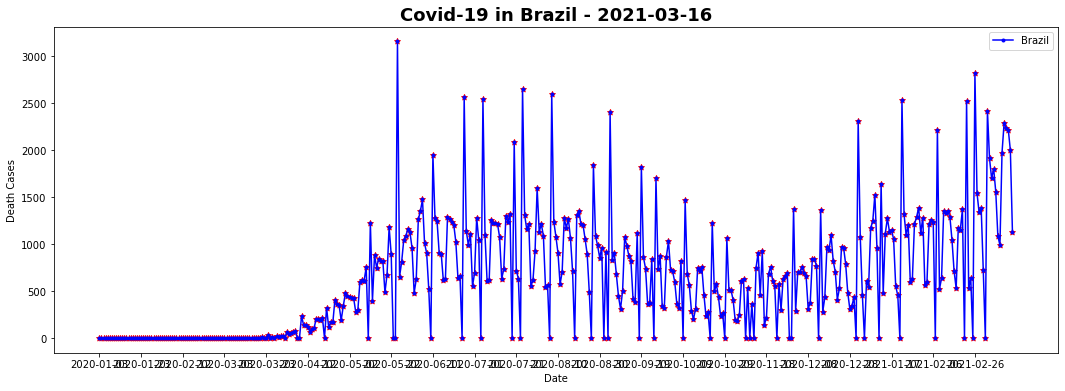

In [38]:
# Aumenta o tamanho do gráfico na proporção 8:5
plt.figure(figsize=(18,6))

# Coloca o título no Gráfico
plt.title('Covid-19 in Brazil - '+ actual, fontdict={'fontweight':'bold', 
                                                     'fontsize': 18})

# Plotando cada uma das curvas
plt.plot(df_Br.Date_reported, df_Br.New_deaths, 'b.-', label='Brazil')
plt.scatter(df_Br.Date_reported, df_Br.New_deaths, marker="*", color='red')

# Define o passo do eixo x
plt.xticks(df_Br.Date_reported [::20])

# Legenda para o eixo X:
plt.xlabel('Date')

# Leganda para o eixo Y:
plt.ylabel('Death Cases')

# Faz a legenda aparecer
plt.legend()

# Salva o gráfico como um arquivo .png
#plt.savefig('Covid_Brazil_figure.png', dpi=300)

# Plota o gráfico
plt.show()

**This data doesn't look like a distribution. We can distrust the data.**

# Canada

In [39]:
df_ca = df.loc[(df.Country == 'Canada'),['Date_reported','Country','New_cases','New_deaths','Cumulative_deaths']]
df_ca

,Date_reported,Country,New_cases,New_deaths,Cumulative_deaths
16243,2020-01-03,Canada,0,0,0
16244,2020-01-04,Canada,0,0,0
16245,2020-01-05,Canada,0,0,0
16246,2020-01-06,Canada,0,0,0
16247,2020-01-07,Canada,0,0,0
...,...,...,...,...,...
16677,2021-03-12,Canada,3221,31,22335
16678,2021-03-13,Canada,3018,36,22371
16679,2021-03-14,Canada,3476,33,22404
16680,2021-03-15,Canada,2968,30,22434


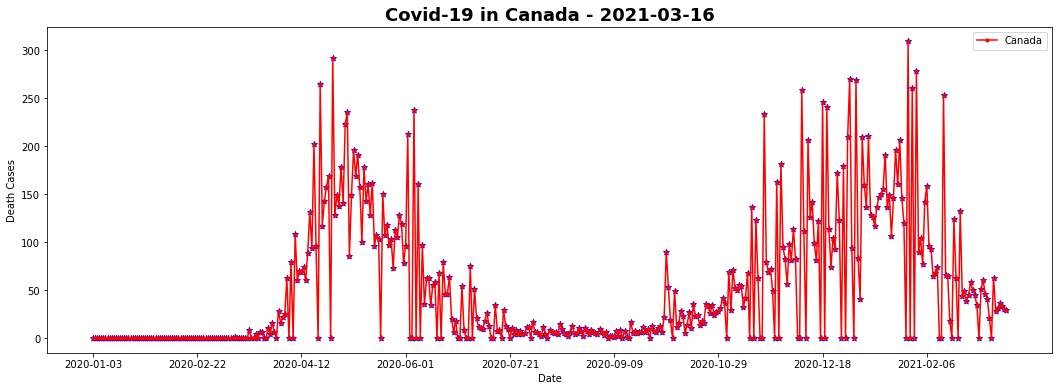

In [40]:
# Aumenta o tamanho do gráfico na proporção 8:5
plt.figure(figsize=(18,6))

# Coloca o título no Gráfico
plt.title('Covid-19 in Canada - '+ actual, fontdict={'fontweight':'bold', 
                                                     'fontsize': 18})

# Plotando cada uma das curvas
plt.plot(df_ca.Date_reported, df_ca.New_deaths, 'r.-', label='Canada')
plt.scatter(df_ca.Date_reported, df_ca.New_deaths, marker="*", color='blue')

# Define o passo do eixo x
plt.xticks(df_ca.Date_reported [::50])

# Legenda para o eixo X:
plt.xlabel('Date')

# Leganda para o eixo Y:
plt.ylabel('Death Cases')

# Faz a legenda aparecer
plt.legend()

# Salva o gráfico como um arquivo .png
#plt.savefig('Covid_Ca_figure.png', dpi=300)

# Plota o gráfico
plt.show()

**Here we have a much smoother curve. More consistent with a distribution. There is nothing here to suggest a next wave.**

In [41]:
df_ca['smooth'] = df_ca['New_deaths'].rolling(7).mean()
df_ca.head()

,Date_reported,Country,New_cases,New_deaths,Cumulative_deaths,smooth
16243,2020-01-03,Canada,0,0,0,NaN
16244,2020-01-04,Canada,0,0,0,NaN
16245,2020-01-05,Canada,0,0,0,NaN
16246,2020-01-06,Canada,0,0,0,NaN
16247,2020-01-07,Canada,0,0,0,NaN


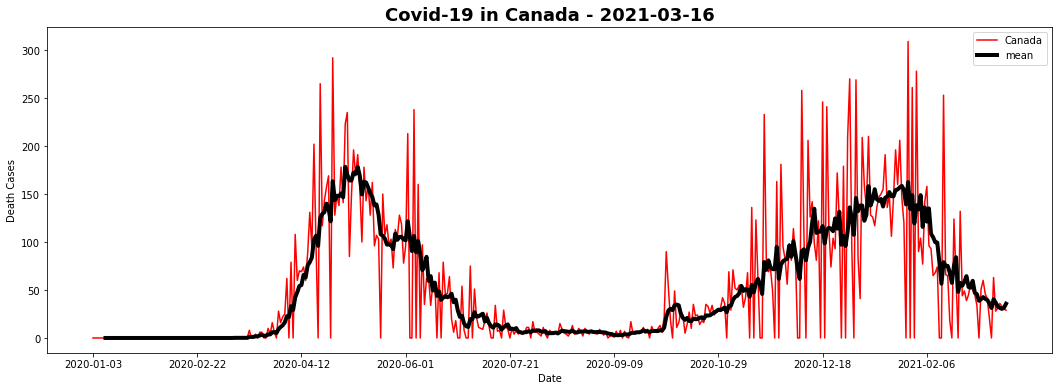

In [42]:
# Aumenta o tamanho do gráfico na proporção 8:5
plt.figure(figsize=(18,6))

# Coloca o título no Gráfico
plt.title('Covid-19 in Canada - '+ actual, fontdict={'fontweight':'bold', 
                                                     'fontsize': 18})

# Plotando cada uma das curvas
plt.plot(df_ca.Date_reported, df_ca.New_deaths, color = "red", label='Canada')
plt.plot(df_ca.Date_reported, df_ca.smooth, color = "black", label='mean', lw=4)
#plt.scatter(df_ca.Date_reported, df_ca.New_deaths, marker="*", color='blue')

# Define o passo do eixo x
plt.xticks(df_ca.Date_reported [::50])

# Legenda para o eixo X:
plt.xlabel('Date')

# Leganda para o eixo Y:
plt.ylabel('Death Cases')

# Faz a legenda aparecer
plt.legend()

# Salva o gráfico como um arquivo .png
plt.savefig('images/Covid_Ca_figure.png', dpi=300)

# Plota o gráfico
plt.show()